# **Chargement des bibliothèques et fonctions: à executer**

In [1]:
## pas besoins de lancer ce code si vous ne travaillez pas avec google colab et si vos fichiers ne sont pas stockés dans votre drive Google
## instalation de google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## à lancer pour importer les bibliothèques nécessaires. (selenieum ne fonctionne pas sur le web)
import warnings
warnings.filterwarnings("ignore")
from time import sleep
# from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.common.keys import Keys
import pandas as pd
import re
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
### fonction visulalisation d'un avis cliens : choisir un indice

def afficher (df,indice):
# indice = 5
  print('Valeurs pour indice',indice)
  for colonne in df.columns:
    print(colonne , ':------>',df[colonne][indice],'')

# **Analyse des données scrapées**

In [ ]:
### chargement et lecture de fichier brut non traité: !! attention , modifier le chemin d'accès au fichier !!
df = pd.read_excel('/content/drive/MyDrive/Projet Datascientest/Datas/Final_data_scraped_brut.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66061 entries, 0 to 66060
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        66061 non-null  int64 
 1   categorie_bis     66061 non-null  object
 2   companies         66061 non-null  object
 3   noms              66057 non-null  object
 4   titre_com         66061 non-null  object
 5   commentaire       66061 non-null  object
 6   reponses          17961 non-null  object
 7   notes             66061 non-null  object
 8   date_experience   66061 non-null  object
 9   date_commentaire  66061 non-null  object
 10  site              66061 non-null  object
 11  nombre_pages      66061 non-null  int64 
 12  date_scrap        66061 non-null  object
dtypes: int64(2), object(11)
memory usage: 6.6+ MB


In [ ]:
## nous affichons ici les différentes catégories scrapées
# df.loc[df.noms =='Bernard Juster']
df.head(10)
df['categorie_bis'].unique()

array(['furniture_store', 'bank', 'travel_insurance_company',
       'car_dealer', 'jewelry_store', 'clothing_store',
       'electronics_technology', 'fitness_and_nutrition_service',
       'pet_store', 'activewear_store', 'womens_clothing_store',
       'bedroom_furniture_store', 'appliance_store', 'bicycle_store',
       'mens_clothing_store', 'mortgage_broker', 'shoe_store',
       'cosmetics_store', 'electronics_store', 'energy_supplier',
       'garden_center', 'insurance_agency', 'real_estate_agents',
       'travel_agency'], dtype=object)

In [ ]:
### visulalisation d'un avis cliens : choisir un indice

afficher (6004)

Valeurs pour indice 6004
Unnamed: 0 :-----------> 6004 
categorie_bis :-----------> travel_insurance_company 
companies :-----------> Axa Schengen Reviews 
noms :-----------> Mohamed Salih 
titre_com :-----------> It was simple and easy process 
commentaire :-----------> Date of experience: June 25, 2022 
reponses :-----------> nan 
notes :-----------> <div class="star-rating_starRating__4rrcf star-rating_medium__iN6Ty"><img alt="Rated 5 out of 5 stars" src="https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-5.svg"/></div> 
date_experience :-----------> Date of experience: June 25, 2022 
date_commentaire :-----------> Jun 25, 2022 
site :-----------> https://www.trustpilot.com/review/www.axa-schengen.com?page=14 
nombre_pages :-----------> 41 
date_scrap :-----------> 17-09-2023 


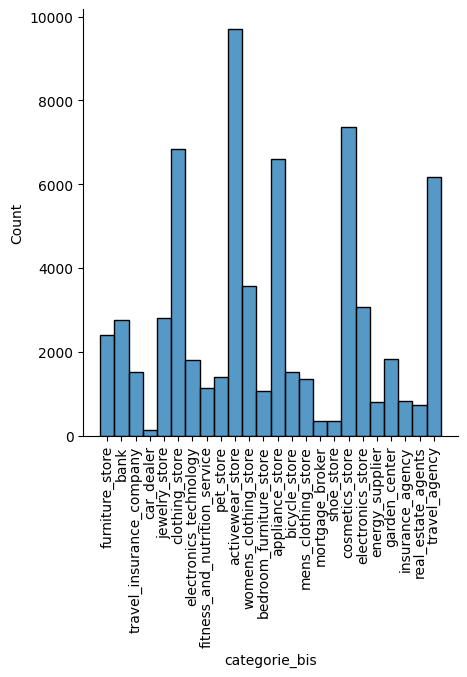

In [ ]:
## un peu de visualisation ne fait pas de mal

sns.displot(df['categorie_bis'])

# Récupérez l'objet Axes
ax = plt.gca()
# Utilisez set_xticklabels pour définir l'orientation des labels de l'axe x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotation de 90 degrés (ou la valeur souhaitée)
# Affichez le graphique
plt.show();


# **Nettoyage des données: data cleanning.**

In [4]:
## chargement et lecture de fichier brut non traité:  !! attention , modifier le chemin d'accès au fichier !!
df_brut = pd.read_excel('/content/drive/MyDrive/Projet Datascientest/Datas/Final_data_scraped_brut.xlsx')


**Data cleanning : suppression des colonnes inutiles**

In [6]:
df = df_brut

### supprimer la colonne: Unnamed: 0
try:
  df = df.drop(columns=['Unnamed: 0'])
except:
  print('La Colonne Unnamed: 0 est déja supprimée!')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66061 entries, 0 to 66060
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   categorie_bis     66061 non-null  object
 1   companies         66061 non-null  object
 2   noms              66057 non-null  object
 3   titre_com         66061 non-null  object
 4   commentaire       66061 non-null  object
 5   reponses          17961 non-null  object
 6   notes             66061 non-null  object
 7   date_experience   66061 non-null  object
 8   date_commentaire  66061 non-null  object
 9   site              66061 non-null  object
 10  nombre_pages      66061 non-null  int64 
 11  date_scrap        66061 non-null  object
dtypes: int64(1), object(11)
memory usage: 6.0+ MB


**Data cleaning: extraire la note de l'avis client + colonne verified**

In [ ]:
## extraite la note de l'avis client
# Définissez une fonction pour extraire la note en utilisant une expression régulière
def extraire_note(description):
    match = re.search(r'Rated\s+(\d+)', str(description))
    if match:
        return match.group(1)
    else:
        return description

# Appliquez la fonction à la colonne 'Description' pour créer une nouvelle colonne 'Note'
df['notes'] = df['notes'].apply(extraire_note)

## ajout de la colonne vérified et remplacement des valeurs par 0 ou 1
df['verified'] = df['date_commentaire'].str.extract(r'(Verified)')
df['verified'] = df['verified'].replace(to_replace=['Verified'], value = [1])
df['verified'] = df['verified'].fillna(0).astype(int)

# Affichez le DataFrame résultant
# df.head()
df['verified'] .unique()

array([0, 1])

In [11]:
## pour afficher l'avis avec l'indice 1101
afficher (1101)

Valeurs pour indice 1101
categorie_bis :-----> furniture_store 
companies :-----> Vente-unique.com Reviews 
noms :-----> Fanta Kourouma 
titre_com :-----> J’adore ma table facile à monter et le… 
commentaire :-----> J’adore ma table facile à monter et le design est juste magnifique 🥰😍✌🏽Merci merci merci !!! 
reponses :-----> nan 
notes :-----> <div class="star-rating_starRating__4rrcf star-rating_medium__iN6Ty"><img alt="Rated 5 out of 5 stars" src="https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-5.svg"/></div> 
date_experience :-----> Date of experience: April 30, 2022 
date_commentaire :-----> Apr 30, 2022Invited 
site :-----> https://www.trustpilot.com/review/www.vente-unique.com?page=4 
nombre_pages :-----> 27 
date_scrap :-----> 17-09-2023 


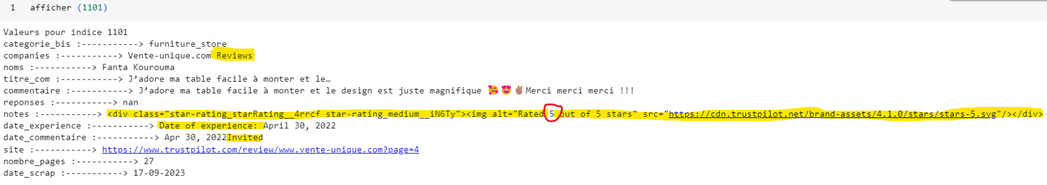

Comme vous pouvez le remarquer, les données contiennent des extraits de code Html (surligné en jaune). 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66061 entries, 0 to 66060
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   categorie_bis     66061 non-null  object
 1   companies         66061 non-null  object
 2   noms              66057 non-null  object
 3   titre_com         66061 non-null  object
 4   commentaire       66061 non-null  object
 5   reponses          17961 non-null  object
 6   notes             66061 non-null  object
 7   date_experience   66061 non-null  object
 8   date_commentaire  66061 non-null  object
 9   site              66061 non-null  object
 10  nombre_pages      66061 non-null  int64 
 11  date_scrap        66061 non-null  object
dtypes: int64(1), object(11)
memory usage: 6.0+ MB


**Data cleanning: Remplacer une liste de mots par un mot X**

In [ ]:
## la fonction remplacer mots pour nettoyer certaines colonnes
def remplacer_mots_par_X(phrase, mots_a_remplacer):
    for mot in mots_a_remplacer:
        phrase = phrase.replace(mot, '')
    return phrase

# Liste des mots à remplacer
mots_a_remplacer = ["Reviews", "Date of experience: ",'<br/><br/>','<br/></p>','</p>','<br/>','<p class="typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX" data-service-review-business-reply-text-typography="true">']
mots_a_remplacer_date = ["Verified","Updated ","Invited"," ago","Merged","Redirected"]

# Appliquer la fonction à toutes les colonnes
for nom_colonne in df.columns:
    df[nom_colonne] = df[nom_colonne].astype(str)
    df[nom_colonne] = df[nom_colonne].apply(lambda x: remplacer_mots_par_X(x, mots_a_remplacer))

df['date_commentaire'] = df['date_commentaire'].apply(lambda x: remplacer_mots_par_X(x, mots_a_remplacer_date))

# Afficher le DataFrame modifié

afficher (60000)


Valeurs pour indice 60000
categorie_bis :-----------> cosmetics_store 
companies :-----------> Florihana  
noms :-----------> Tammy 
titre_com :-----------> Oils were exactly as expected 
commentaire :-----------> Oils were exactly as expected.  Very pure and clean. 
reponses :-----------> nan 
notes :-----------> 4 
date_experience :-----------> November 17, 2020 
date_commentaire :-----------> Nov 17, 2020 
site :-----------> https://www.trustpilot.com/review/florihana.com?page=117 
nombre_pages :-----------> 206 
date_scrap :-----------> 24-09-2023 
verified :-----------> 1 


**Data cleaning: Traitement des colonnes dates: Trouver le bon format**

In [ ]:
from datetime import datetime

# for nom_colonne in df.columns:
#     df[nom_colonne] = df[nom_colonne].astype(str)

# Fonction pour convertir la chaîne en date au format "dd/mm/aaaa"

def convertir_date(chaine):
    try:
        date_obj = datetime.strptime(chaine, "%b %d, %Y")
        # return pd.to_datetime(date_obj, format='%b/%m/%Y')
        return date_obj.strftime("%d/%m/%Y")

    except ValueError:
        # En cas d'erreur, renvoyer une date par défaut ou une autre valeur selon vos besoins
        return chaine

# Fonction pour convertir la chaîne en date au format "dd/mm/aaaa"

def convertir_date2(chaine):
    try:
        date_obj = datetime.strptime(chaine, "%B %d, %Y")
        # return pd.to_datetime(date_obj, format='%b/%m/%Y')
        return date_obj.strftime("%d/%m/%Y")
    except ValueError:
        # En cas d'erreur, renvoyer une date par défaut ou une autre valeur selon vos besoins
        return chaine

df['date_commentaire'] = df['date_commentaire'].apply(lambda x: convertir_date(x))
df['date_experience'] = df['date_experience'].apply(lambda x: convertir_date2(x))

mask = df['date_commentaire'].str.contains(r'\b(days|day|minutes|minute|hours|hour)\b', case=False)
# Utilisez le masque pour supprimer les lignes correspondantes du DataFrame
df = df[~mask]

# Affichez le DataFrame modifié
# df.head()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65584 entries, 0 to 66060
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   categorie_bis     65584 non-null  object
 1   companies         65584 non-null  object
 2   noms              65584 non-null  object
 3   titre_com         65584 non-null  object
 4   commentaire       65584 non-null  object
 5   reponses          65584 non-null  object
 6   notes             65584 non-null  object
 7   date_experience   65584 non-null  object
 8   date_commentaire  65584 non-null  object
 9   site              65584 non-null  object
 10  nombre_pages      65584 non-null  object
 11  date_scrap        65584 non-null  object
 12  verified          65584 non-null  object
dtypes: object(13)
memory usage: 7.0+ MB


**Modification des formats et le type des colonnes** 

ajout de nouvelles colonnes; isoler les éléments des dates: jour, mois, année

In [ ]:
df["notes"] = df["notes"].astype(int)
df["verified"] = df["verified"].astype(int)
df["nombre_pages"] = df["nombre_pages"].astype(int)
df["date_experience"] =  pd.to_datetime(df["date_experience"], format='%d/%m/%Y')
df["date_commentaire"] =  pd.to_datetime(df["date_commentaire"], format='%d/%m/%Y')
# df["date_scrap"] =  pd.to_datetime(df["date_scrap"], format='%d/%m/%Y')
# df["date_scrap"] =  pd.to_datetime(df["date_scrap"], format='%d-%m-%Y').strftime('%d/%m/%Y')

# Année
df["année_experience"] = df['date_experience'].dt.year
# Mois
df["mois_experience"] = df['date_experience'].dt.month
# Jour du mois
df["jour_experience"] = df['date_experience'].dt.day
# Année
df["année_commentaire"] = df['date_commentaire'].dt.year
# Mois
df["mois_commentaire"] = df['date_commentaire'].dt.month
# Jour du mois
df["jour_commentaire"] = df['date_commentaire'].dt.day

## écart entre date experience et date commentaire:
df['leadtime_com_exp'] = df['date_commentaire'] - df['date_experience']



**Compléter la colonne commentaire.**

In [ ]:
## si le commentaire est vide (ou au format date) mettre : aaaaa pas de commentaire!.
def replace_texte(cell_value):
    try:
        pd.to_datetime(cell_value, format = '%B %d, %Y')
        return 'aaaaa pas de commentaire!'  # Remplacez par 'pas de commentaire' si pas de commentaire

    except ValueError:
        return cell_value  # Conservez si un commentaire existe

df['commentaire'] = df['commentaire'].apply(replace_texte)

### remplacer 'aaaaa pas de commentaire!' par le titre de commentaire

def replace_value(cell_value, other_value):
    if cell_value == 'aaaaa pas de commentaire!':
        return other_value  # Remplacez par le contenu de 'col2' si la valeur de 'col1' est 'xxxx'
    else:
        return cell_value  # Conservez la valeur de 'col1' sinon

df['commentaire'] = df.apply(lambda row: replace_value(row['commentaire'], row['titre_com']), axis=1)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65584 entries, 0 to 66060
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   categorie_bis      65584 non-null  object         
 1   companies          65584 non-null  object         
 2   noms               65584 non-null  object         
 3   titre_com          65584 non-null  object         
 4   commentaire        65584 non-null  object         
 5   reponses           65584 non-null  object         
 6   notes              65584 non-null  int64          
 7   date_experience    65584 non-null  datetime64[ns] 
 8   date_commentaire   65584 non-null  datetime64[ns] 
 9   site               65584 non-null  object         
 10  nombre_pages       65584 non-null  int64          
 11  date_scrap         65584 non-null  object         
 12  verified           65584 non-null  int64          
 13  année_experience   65584 non-null  int64      

In [ ]:
# Enregistrer le dataframe dans un fichier .csv / xlsx

df.to_excel('/content/drive/MyDrive/Projet Datascientest/Datas/Final_data_scraped_traité_non_traduit.xlsx')
